# Investpy

In [ ]:
# requirements.txt
!pip install investpy
!pip install matplotlib
!pip install seaborn

In [1]:
import investpy as inv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
TODAY = date.today().strftime('%d/%m/%Y')

### 국가 별 상장주식 정보

In [2]:
inv.get_stocks_overview('United States', n_results=1000)

country                  name symbol    last      high      low  \
0    united states                Boeing     BA  136.99  139.2400  134.890   
1    united states        General Motors     GM   30.87   32.2000   30.790   
2    united states               Chevron    CVX  141.51  142.8500  139.930   
3    united states             Citigroup      C   46.19   46.8000   46.090   
4    united states       Bank of America    BAC   31.46   31.7900   31.290   
..             ...                   ...    ...     ...       ...      ...   
995  united states         Greene County   GCBC   50.59   51.6100   50.290   
996  united states                Gencor   GENC    9.56    9.8400    9.500   
997  united states  Genetic Technologies   GENE    1.32    1.3700    1.314   
998  united states                 Geron   GERN    1.77    1.9198    1.770   
999  united states                  Gevo   GEVO    2.34    2.4700    2.320   

      change change_percentage  turnover currency  
0      -2.08            -1.50%   6150000      USD  
1      -1.44            -4.46%  16820000      USD  
2      -1.26            -0.88%   7030000      USD  
3      -0.63            -1.35%  12590000      USD  
4      -0.33            -1.04%  29150000      USD  
..       ...               ...       ...      ...  
995    -0.19            -0.37%      6830      USD  
996    -0.11            -1.14%      6340      USD  
997   -0.040            -2.94%     45470      USD  
998  -0.1600            -8.29%   2290000      USD  
999   -0.150            -6.02%   7150000      USD  

[1000 rows x 10 columns]

In [3]:
inv.get_stocks_overview('South Korea', n_results=1000)

country                       name  symbol      last      high  \
0    south korea              Hanon Systems  018880    9780.0   10150.0   
1    south korea       Kumho Petro Chemical  011780  121500.0  126500.0   
2    south korea             LG Electronics  066570   89500.0   90900.0   
3    south korea  Samsung Electro-Mechanics  009150  132000.0  133500.0   
4    south korea           Hanall Biopharma  009420   17950.0   18150.0   
..           ...                        ...     ...       ...       ...   
995  south korea                     InBody  041830   22950.0   23550.0   
996  south korea               EstechPharma  041910    7570.0    7780.0   
997  south korea                    Mediana  041920    5460.0    5650.0   
998  south korea            Dong-A Hwa Sung  041930    7710.0    7990.0   
999  south korea             Komipharm Intl  041960    6940.0    7120.0   

          low change change_percentage  turnover currency  
0      9770.0   -270            -2.69%    203170      KRW  
1    121000.0  -5500            -4.33%     86600      KRW  
2     89100.0  -1800            -1.97%    323000      KRW  
3    131000.0  -2000            -1.49%    158350      KRW  
4     17450.0   +300            +1.70%     83850      KRW  
..        ...    ...               ...       ...      ...  
995   22800.0   -400            -1.71%      5350      KRW  
996    7540.0   -210            -2.70%      8810      KRW  
997    5290.0   +260            +5.00%   1060000      KRW  
998    7680.0   -280            -3.50%     23580      KRW  
999    6910.0   -180            -2.53%     65410      KRW  

[1000 rows x 10 columns]

### 개별종목 가격 정보

In [4]:
tesla = inv.get_stock_historical_data(stock='TSLA', country='United States', from_date='01/01/2021', to_date=TODAY)
tesla.tail()

Open    High     Low   Close    Volume Currency
Date                                                         
2022-07-05  669.00  699.44  648.50  699.20  28009800      USD
2022-07-06  692.34  703.69  681.56  695.20  23805600      USD
2022-07-07  701.76  736.09  696.63  733.63  27080900      USD
2022-07-08  727.00  764.94  723.48  752.29  33951400      USD
2022-07-11  756.31  759.19  700.88  703.03  33017800      USD

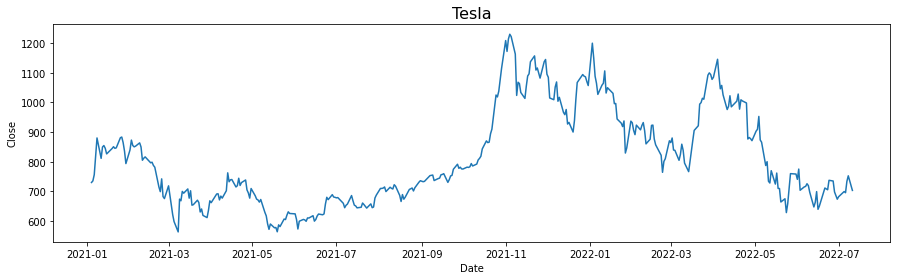

In [5]:
plt.figure(figsize=(15,4))
ax = sns.lineplot(data=tesla, x='Date', y='Close')
plt.title('Tesla', fontsize=16)
plt.show()

### ETF 가격 정보

In [6]:
tqqq = inv.get_etf_historical_data(etf='ProShares UltraPro QQQ', country='United States', from_date='01/01/2021', to_date=TODAY)
sqqq = inv.get_etf_historical_data(etf='ProShares UltraPro Short QQQ', country='United States', from_date='01/01/2021', to_date=TODAY)
tqqq.tail()

Open   High    Low  Close     Volume Currency Exchange
Date                                                               
2022-07-05  23.41  25.68  23.00  25.65  218694000      USD   NASDAQ
2022-07-06  25.77  26.72  25.28  26.14  204962000      USD   NASDAQ
2022-07-07  26.38  28.00  26.37  27.76  136664000      USD   NASDAQ
2022-07-08  26.99  28.31  26.71  27.89  159244992      USD   NASDAQ
2022-07-11  27.13  27.27  25.86  26.09  128152112      USD   NASDAQ

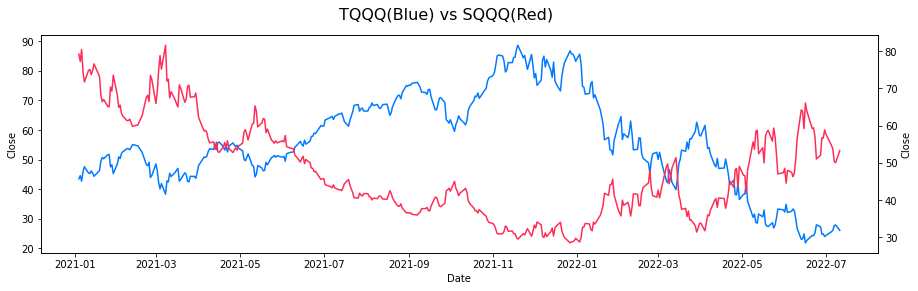

In [7]:
fig, ax1 = plt.subplots(figsize=(15,4))
sns.lineplot(ax=ax1, data=tqqq, x='Date', y='Close', color='#007aff')
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, data=sqqq, x='Date', y='Close', color='#ff2d55')
fig.suptitle('TQQQ(Blue) vs SQQQ(Red)', fontsize=16)
plt.show()

### 인덱스 정보

In [16]:
nasdaq = inv.get_index_historical_data(index='Nasdaq', country='United States', from_date='01/01/2021', to_date=TODAY)
kospi = inv.get_index_historical_data(index='KOSPI', country='South Korea', from_date='01/01/2021', to_date=TODAY)
nasdaq.tail()

Open      High       Low     Close      Volume Currency
Date                                                                   
2022-07-05  10964.18  11323.89  10911.45  11322.24  1065360000      USD
2022-07-06  11337.90  11443.14  11250.32  11361.85   933390016      USD
2022-07-07  11422.60  11644.47  11412.88  11621.35   916259968      USD
2022-07-08  11503.61  11689.70  11479.77  11635.31   820689984      USD
2022-07-11  11524.74  11540.42  11348.85  11372.60   840546752      USD

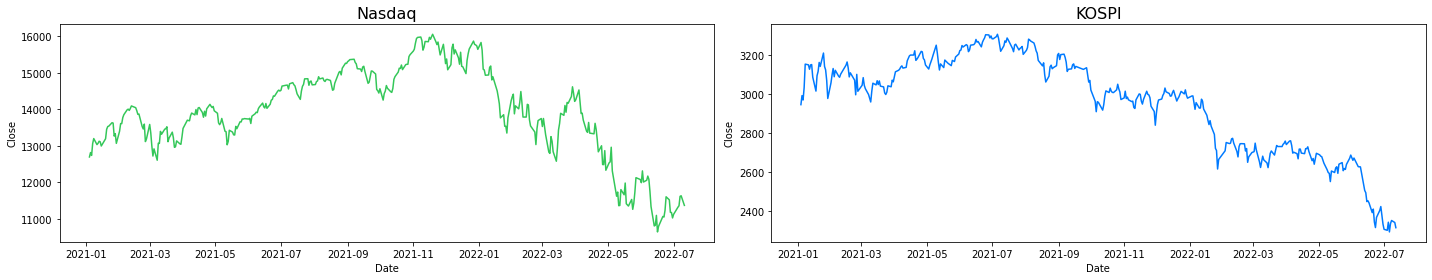

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.lineplot(ax=ax[0], data=nasdaq, x='Date', y='Close', color='#34c759')
ax[0].set_title('Nasdaq', fontsize=16)
sns.lineplot(ax=ax[1], data=kospi, x='Date', y='Close', color='#007aff')
ax[1].set_title('KOSPI', fontsize=16)
plt.tight_layout()
plt.show()

### 환율 정보

In [18]:
krw = inv.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date='01/01/2021', to_date=TODAY)
krw.tail()

Open     High      Low    Close Currency
Date                                                   
2022-07-07  1305.14  1308.74  1295.90  1297.62      KRW
2022-07-08  1297.97  1303.68  1292.29  1294.68      KRW
2022-07-10  1294.79  1294.79  1294.79  1294.79      KRW
2022-07-11  1294.79  1315.17  1294.79  1311.21      KRW
2022-07-12  1311.21  1313.50  1308.40  1312.73      KRW

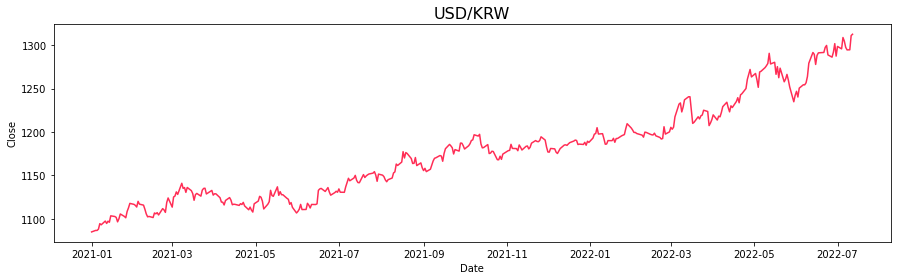

In [19]:
plt.figure(figsize=(15,4))
ax = sns.lineplot(data=krw, x='Date', y='Close', color='#ff2d55')
plt.title('USD/KRW', fontsize=16)
plt.show()